# Breast Cancer Model


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('breast_cancer_data.csv')
#df.drop([''],axis=1)
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [4]:
df=df.drop(['id','Unnamed: 32'],axis=1)

In [5]:
df['diagnosis']=df['diagnosis'].map({'M':0,'B':1})# to replace the M, B to the 0,1
df.diagnosis.unique()

array([0, 1], dtype=int64)

In [6]:
y=df['diagnosis']# target
x=df.drop(['diagnosis'],axis=1)#feature

In [7]:
x.shape

(569, 30)

In [8]:
y.shape

(569,)

In [9]:
type(x)

pandas.core.frame.DataFrame

In [10]:
type(y)

pandas.core.series.Series

In [11]:
df.describe()# exploring the data

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.627417,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,1.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [12]:
# Machine learning model
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x,y)

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [13]:
from sklearn.model_selection import train_test_split
xtr,xts,ytr,yts=train_test_split(x,y,test_size=0.25,stratify=y)


In [14]:
xtr.shape

(426, 30)

In [15]:
xts.shape

(143, 30)

In [38]:
lr.fit(xtr,ytr)#training on new train data
yp=lr.predict(xts)#predicting new data
yplr=lr.score(xts,yts)

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [17]:
# Adding cross Validation
from sklearn.model_selection import cross_val_score
cv_score=cross_val_score(lr,x,y,cv=5)
np.mean(cv_score)

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressio

0.9420276354603322

In [18]:
# Confusion matrix & Classification Model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

[[48  5]
 [ 7 83]]


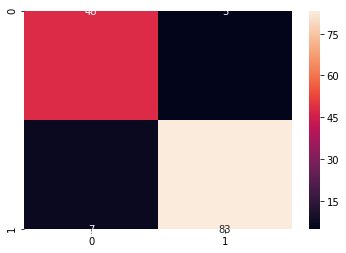

In [19]:

cm=confusion_matrix(yts,yp)# to check original outcome to our models prediction
print(cm)
sns.heatmap(cm,annot=True)

In [20]:
print(classification_report(yts,yp))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89        53
           1       0.94      0.92      0.93        90

    accuracy                           0.92       143
   macro avg       0.91      0.91      0.91       143
weighted avg       0.92      0.92      0.92       143



#  Using Random Forest Classifier

In [31]:
from sklearn.ensemble import RandomForestClassifier
dec=RandomForestClassifier(n_estimators=50)#hyper parameter training
dec.fit(xtr,ytr)
#Evaluate the dec tree
ypdec=dec.score(xts,yts)
yp1=dec.predict(xts)

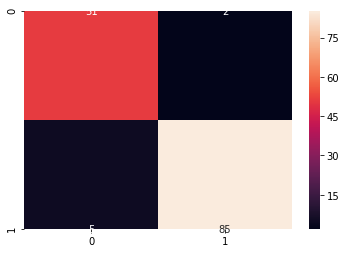

In [22]:
ca=confusion_matrix(yts,yp1)
sns.heatmap(ca,annot=True)

In [36]:
# for any new prediction
yp1=lr.predict([[17.99,10.38,122.8,1001,0.1184,0.2776,0.3001,0.1471,0.2419,0.07871,1.095,0.9053,8.589,153.4,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189]])#lr.predict(xts)
if yp1==0:
    print("malignant")
else:
    print("benign")

malignant


In [23]:
hist(yp)

In [34]:
from sklearn.svm import SVC
svm=SVC()
svm.fit(xtr,ytr)
ypsvm=svm.score(xts,yts)
yp2=svm.predict(xts)

from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x,y)
yplr=lr.predict(xts)

In [35]:
ypsvm

0.8951048951048951

In [40]:
print("Analysis on cancer dataset using three different classification algorithm")
print("SVM algorithm : ",ypsvm)
print("Random Forest Classifier algorithm : ",ypdec)
print("Logistic regression algorithm : ",yplr)

Analysis on cancer dataset using three different classification algorithm
SVM algorithm :  0.8951048951048951
Random Forest Classifier algorithm :  0.9440559440559441
Logistic regression algorithm :  0.916083916083916


(array([1., 0., 0., 0., 1., 0., 0., 0., 0., 1.]), array([89.51048951, 90.        , 90.48951049, 90.97902098, 91.46853147,
       91.95804196, 92.44755245, 92.93706294, 93.42657343, 93.91608392,
       94.40559441]), <a list of 10 Patch objects>)


TypeError: legend only accepts two non-keyword arguments

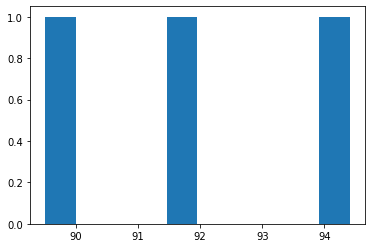

In [46]:
print(plt.hist([ypsvm*100,ypdec*100,yplr*100]))
height=[20,40,60,80,100]
plt.legend("SVM","Random Forest Classifier","Logistic Regression")

In [47]:
yl_can=[ypsvm,ypdec,yplr]
yl_can

[0.8951048951048951, 0.9440559440559441, 0.916083916083916]